# **Principal Component Analysis Algorithm from scratch** 

In [7]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import io

Importing Dataset

In [6]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [9]:
iris_data = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

**Exploratory Data Analysis**

In [10]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Print the first 5 and last 5 rows of the dataset

In [12]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

Null count analysis before modelling to keep check

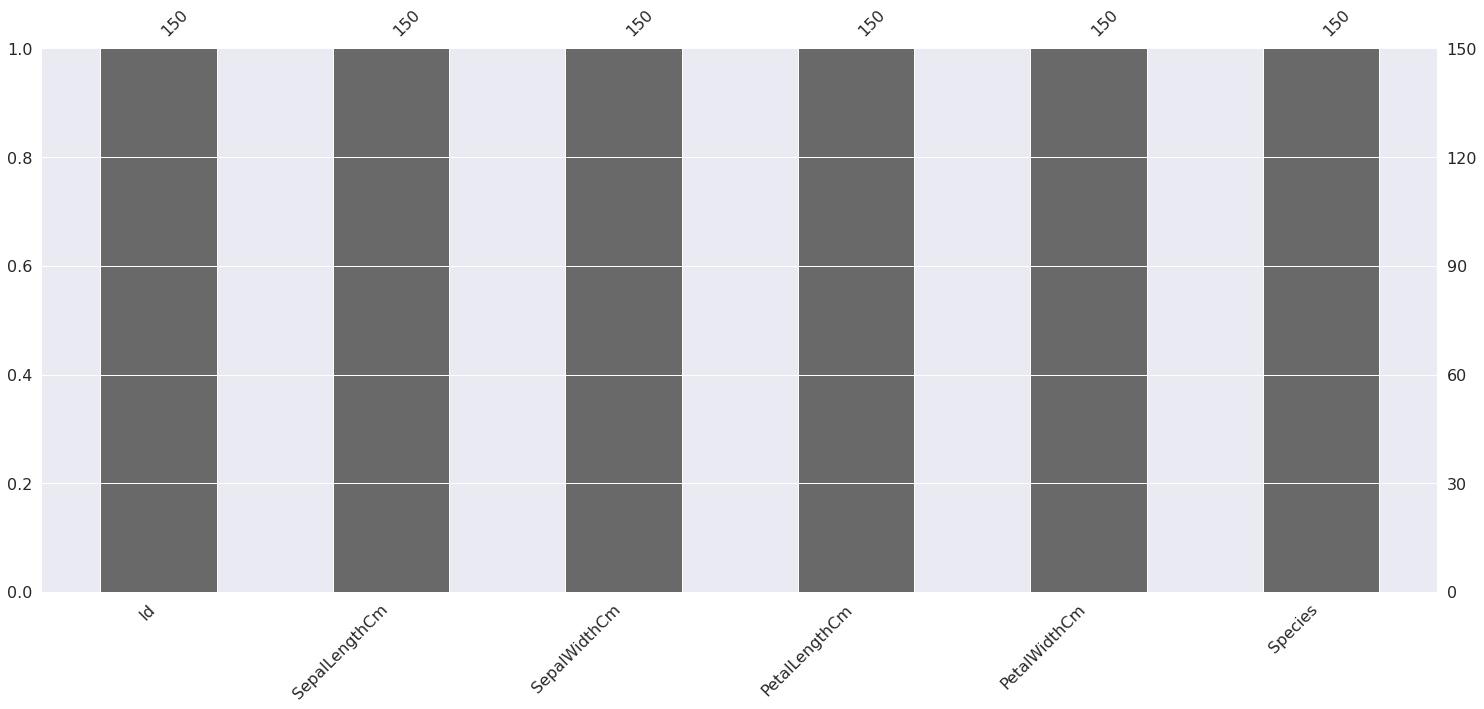

In [15]:
import missingno as msno
p=msno.bar(iris_data)

Bivariate Analysis

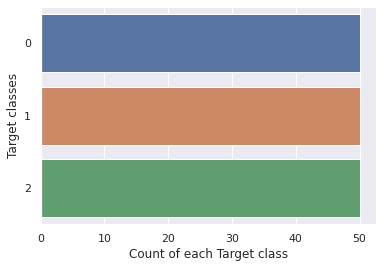

In [16]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

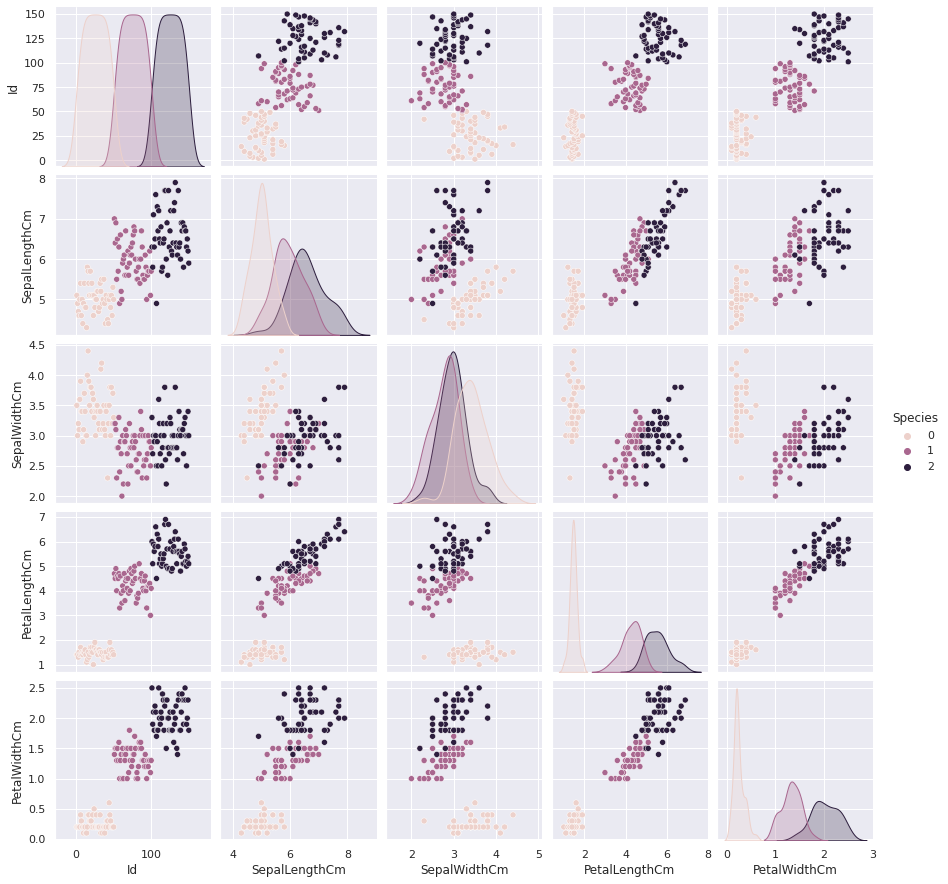

In [32]:
p=sns.pairplot(iris_data, hue = 'Species')

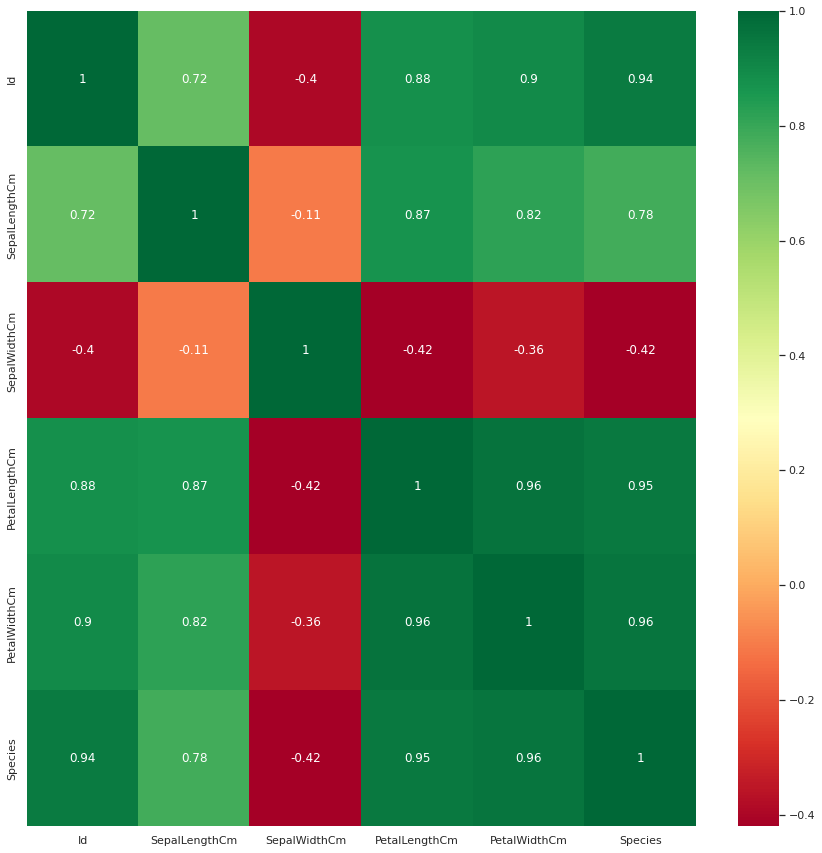

In [33]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

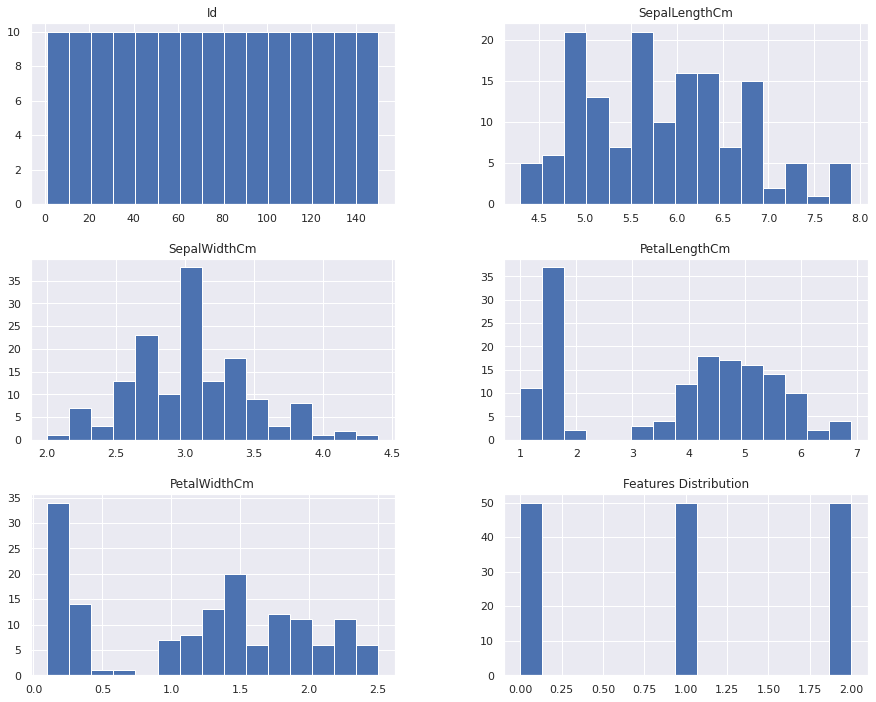

In [34]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

**Modelling of the Dataset using PCA**

In [36]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [40]:
pca.get_covariance()

array([[ 0.08501869,  0.04806653, -0.02095157,  0.07697393,  0.08342342],
       [ 0.04806653,  0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.02095157, -0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.07697393,  0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.08342342,  0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [41]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84094005, 0.09198147, 0.04225984, 0.01996366, 0.00485498])

In [42]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [43]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [44]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score",knn_pca.score(X_train_new,y_train),"%")
print("Test score",knn_pca.score(X_test_new,y_test),"%")

Train score 0.9904761904761905 %
Test score 1.0 %


**Visualising the Test results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


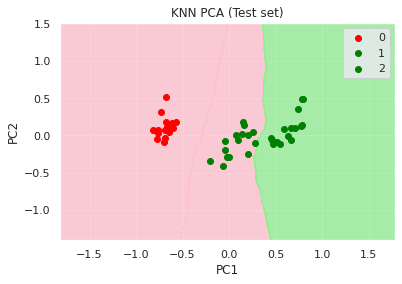

In [45]:
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()